In [42]:
import os
import numpy as np
from astropy.io import ascii as asc
from astropy.table import Table
from astropy.convolution import convolve, Box1DKernel

from matplotlib import pyplot as plt

from utilities_az import spectroscopy as spec

In [2]:
UV_DIR = '../data/swiftuvot/reduced_default/'
OPTICAL_DIR = '../data/spectra/lco/'

# UV and Optical Data

In [7]:
optical_fname = 'asassn15oz_20150904_redblu_rest_dustcorrsca.dat'
UV_fname = 'combine_epoch1_rest_dustcorrsca.dat'


In [47]:
uv_tbdata = asc.read(os.path.join(UV_DIR, UV_fname), names=['wave', 'flux'])
optical_tbdata = asc.read(os.path.join(OPTICAL_DIR, optical_fname), names=['wave', 'flux'])
spec_optical = spec.spectrum1d(optical_tbdata['wave'], optical_tbdata['flux'])

In [46]:
tbdata_syn = asc.read('../data/syn++/asassn15oz_uv.txt', names=['wave', 'flux', 'err'])

In [48]:
spec_syn = spec.spectrum1d(tbdata['wave'], tbdata['flux'])
scale_spec_syn = spec.scale_spectra(spec_syn, spec_optical)

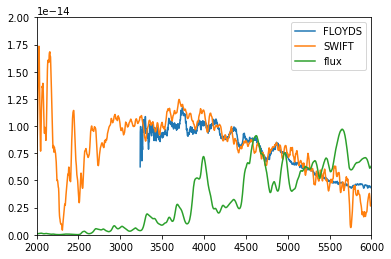

In [49]:
plt.plot(optical_tbdata['wave']+60, convolve(optical_tbdata['flux'], Box1DKernel(3)), label='FLOYDS')
plt.plot(uv_tbdata['wave'], convolve(uv_tbdata['flux'], Box1DKernel(7)), label='SWIFT')
plt.plot(scale_spec_syn.wave, scale_spec_syn.flux)
plt.ylim(0E-14, 2E-14)
plt.xlim(2000, 6000)
plt.legend()